In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
ls

drive/  sample_data/


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('drive/MyDrive/carDekho_dataset/car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
# Checking the categorical variables
len(df['Car_Name'].unique())

98

In [ ]:
print(len(df['Fuel_Type'].unique()))
print(df['Fuel_Type'].unique())

3
['Petrol' 'Diesel' 'CNG']


In [ ]:
print(len(df['Seller_Type'].unique()))
print(df['Seller_Type'].unique())

2
['Dealer' 'Individual']


In [ ]:
print(len(df['Transmission'].unique()))
print(df['Transmission'].unique())

2
['Manual' 'Automatic']


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
set(df['Year'])

{2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018}

In [ ]:
df['Owner'].unique()

array([0, 1, 3])

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df1 = df.drop(['Car_Name'], axis=1)

In [ ]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
def years_old(x):
  return 2020-x

In [ ]:
df1['car_age'] = df1['Year'].apply(years_old)

In [ ]:
df1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [ ]:
df2 = df1.drop(['Year'], axis=1)

In [ ]:
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [ ]:
df3 = pd.get_dummies(df2, drop_first=True)

In [ ]:
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [ ]:
df3.corr() # Checking the correlation

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
car_age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [ ]:
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

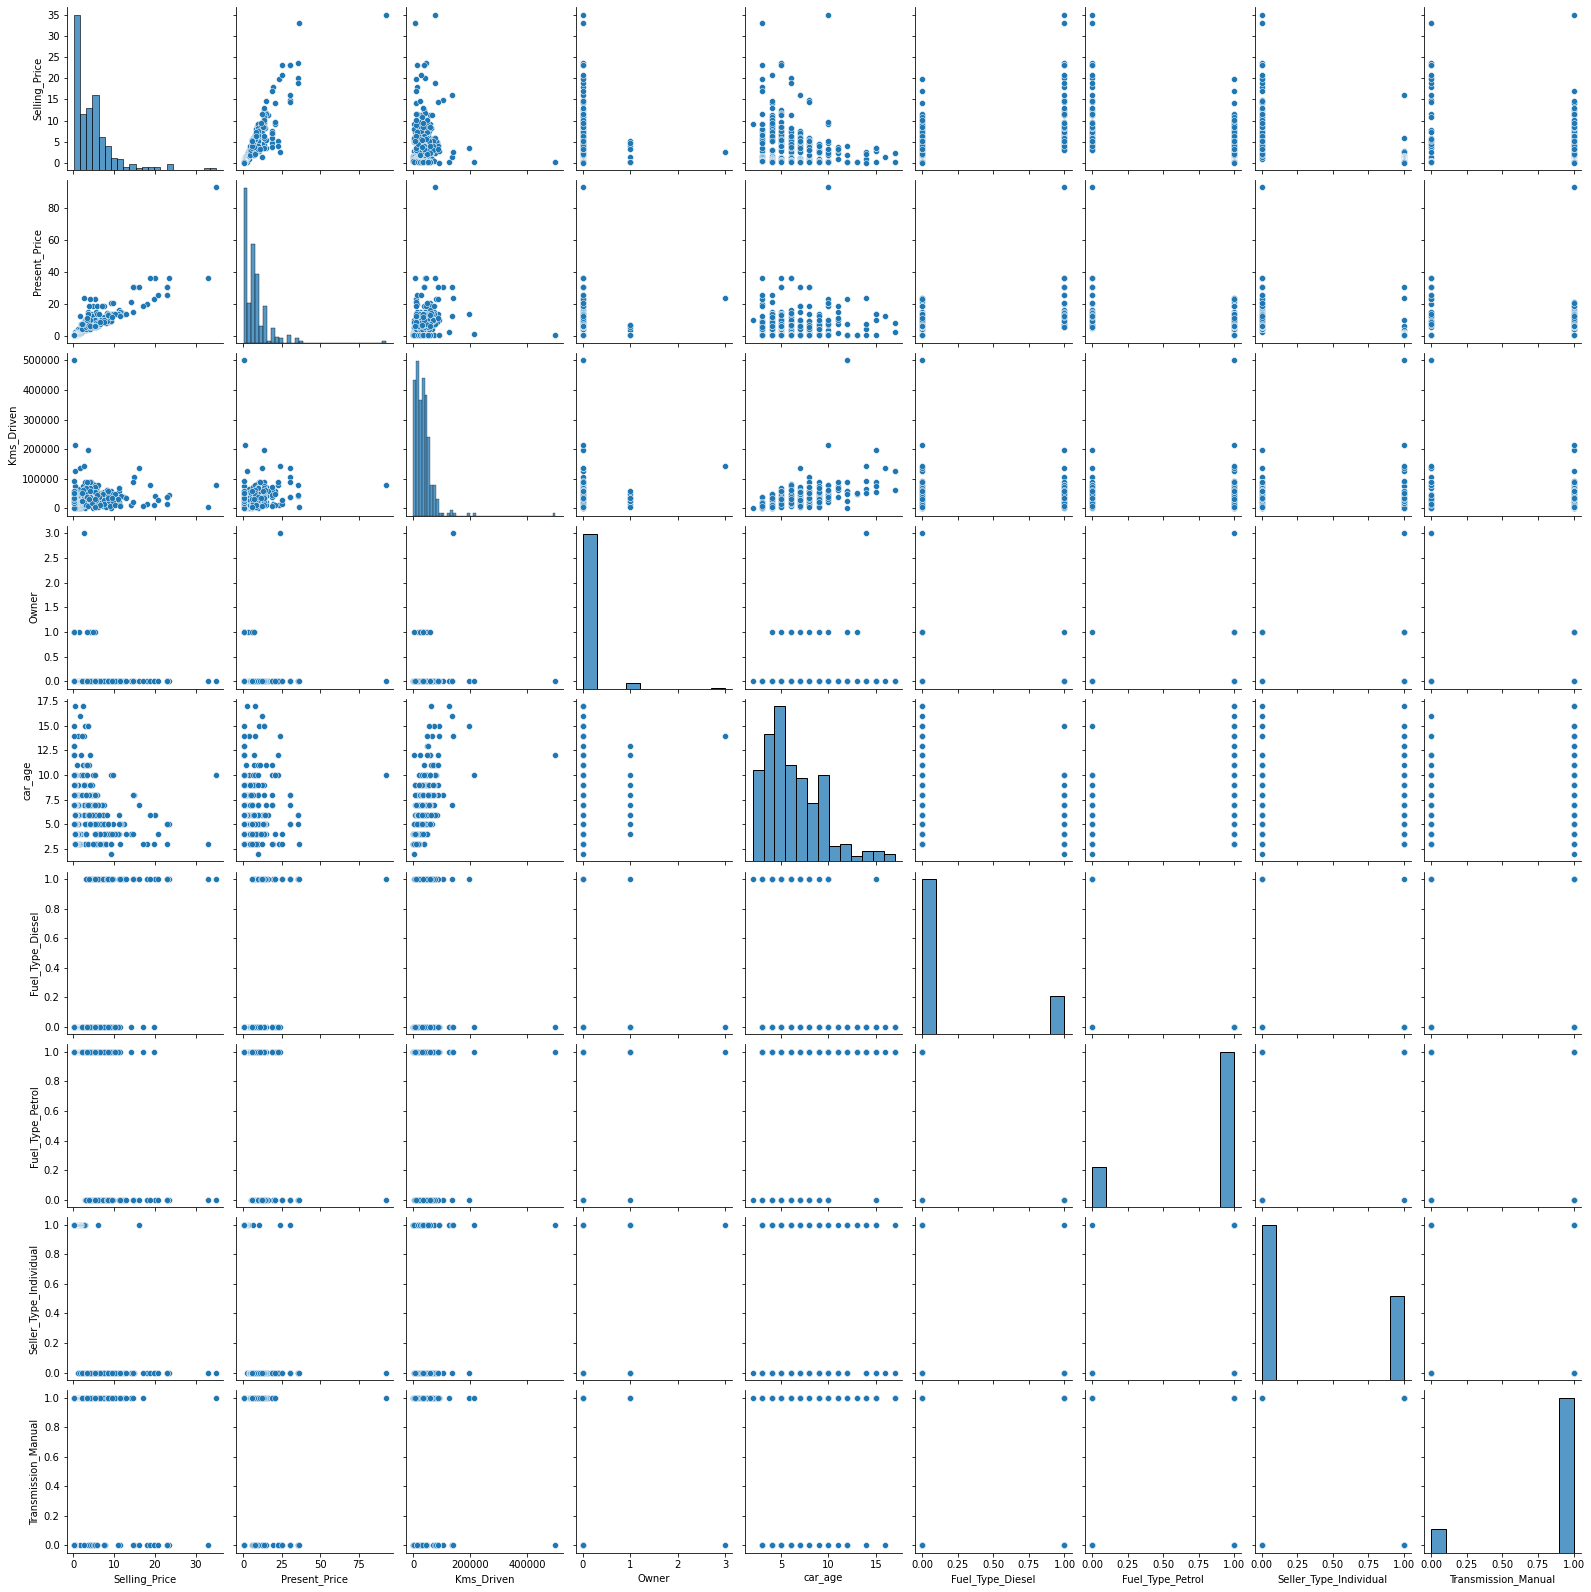

In [ ]:
# The same thing can also be done by visualizing
sns.pairplot(df3)

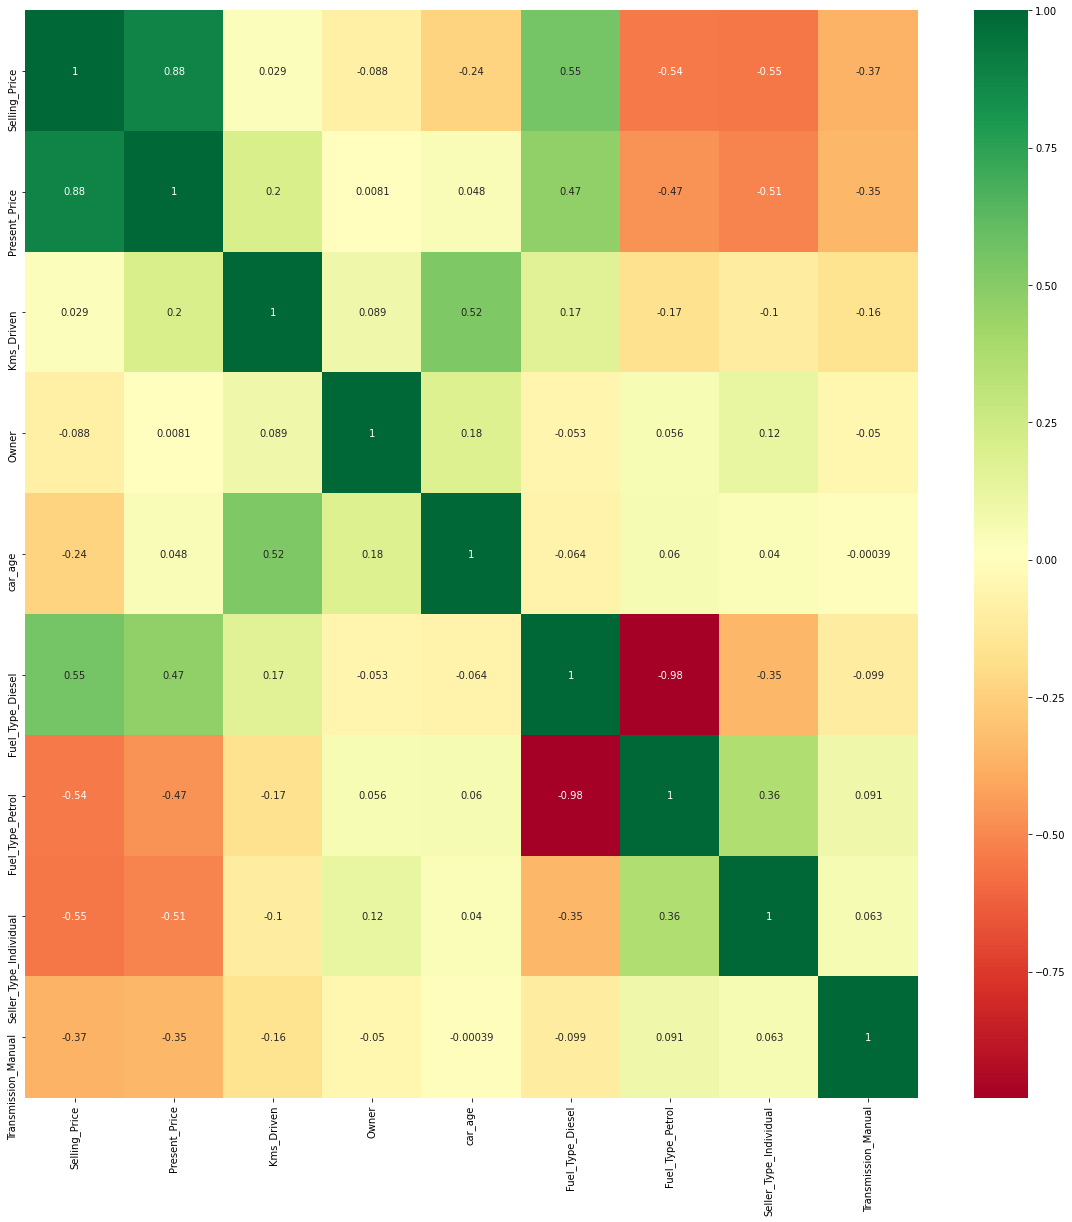

In [ ]:
cor_matrx = df3.corr() # Pearson Correlation
top_corr_features = cor_matrx.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(df3[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [ ]:
X = df3.drop(['Selling_Price'], axis=1)
y = df3['Selling_Price']

In [ ]:
X.head()

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.36936747 0.04179968 0.00082522 0.07607242 0.23555349 0.00916791
 0.124411   0.14280283]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=100, stop= 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5,10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV  ## Little bit faster when compared to gridsearchcv
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
model_rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator=model_rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
pred = rf_random.predict(X_test)

In [ ]:
pred

array([ 0.76403, 10.02351,  5.27253,  0.30547,  6.80972,  6.28065,
        1.01784,  0.61419,  0.50469,  6.28814, 11.40315,  0.9123 ,
        7.4315 ,  0.66972,  5.4209 ,  3.01892,  1.00798, 10.87875,
        0.62306,  1.46055,  0.5503 ,  8.67105,  5.88002,  2.75156,
        0.54962,  3.609  ,  5.26465,  3.1107 ,  1.25334,  1.07155,
        0.66174,  9.52478,  0.43023,  2.62237,  8.02268,  4.12225,
        6.173  ,  4.78684,  3.13975,  5.19874,  3.98122,  4.02702,
        4.86065,  0.56288,  6.86316,  0.56693,  7.13489,  6.29955,
        3.09315,  3.71484,  5.452  ,  1.35608, 20.67081, 20.75922,
        6.7962 ,  8.65453,  5.19843,  9.62051,  2.60481,  7.22652,
        0.29893])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


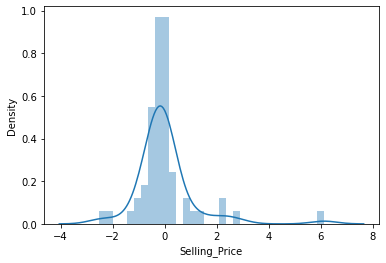

In [ ]:
sns.distplot(y_test - pred)

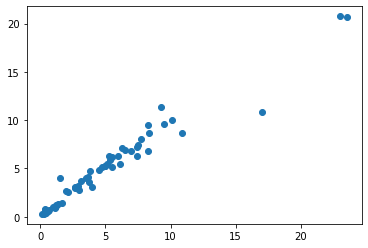

In [ ]:
plt.scatter(y_test, pred)

In [ ]:
import pickle
file = open('model.pkl', 'wb')
pickle.dump(rf_random, file)